<a href="https://colab.research.google.com/github/mcnica89/DATA6100_F23/blob/main/Classification/Logistic_Regression_vs_Naive_Bayes_Discriminant_Analysis_on_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
###
# Import packages
###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

from sklearn.metrics import confusion_matrix

In [ ]:
###
# Load the data and see all available columns
###
df = pd.read_csv('titanic_train.csv')


#Setup a binary variable for male
#df['Male'] = (df['Sex'] == 'male')*1.0
#Setup using the log of the Fare (rather than Fare itself)
df['logFare'] = np.log(df['Fare']+1)
df = pd.get_dummies(df, columns=['Pclass','Sex','SibSp','Parch'])
df.head()

,PassengerId,Survived,Name,Age,Ticket,Fare,Cabin,Embarked,logFare,Pclass_1,...,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,1,0,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,NaN,S,2.110213,0,...,0,0,0,1,0,0,0,0,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,C85,C,4.280593,1,...,0,0,0,1,0,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,NaN,S,2.188856,0,...,0,0,0,1,0,0,0,0,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,C123,S,3.990834,1,...,0,0,0,1,0,0,0,0,0,0
4,5,0,"Allen, Mr. William Henry",35.0,373450,8.0500,NaN,S,2.202765,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
my_ber_vars = ['Sex_male','Sex_female'] + ['Pclass_' + str(i) for i in [1,2,3]] + ['Parch_' + str(i) for i in range(7)] + ['SibSp_' + str(i) for i in range(6)]
my_gauss_vars = ['Age','logFare']
my_vars = my_ber_vars + my_gauss_vars

# ROC curve for a simple logistic model

In [ ]:
###
# Run logisitc regression
###

def LR_using_vars(my_var_list, X_train,Y_train,X_test,Y_test, Verbose=False):
  #Do the logisitc regression using only the variables from my_var_list
  #Return the accuracy and CE_loss on the test set, as well as the entire model

  #Note: Set the "verbose" flag to true to print out lots of details
  if Verbose:
    print("-----------------------")
    print(f"Vars: {my_vars}")
    print("-----------------------")


  LR_model = LogisticRegression(fit_intercept=True, C=1e9) # Large C for no regularization
  LR_fit = LR_model.fit(X_train, Y_train)

  accuracy = LR_model.score(X_test,Y_test)
  preds = LR_model.predict_proba(X_test)[:,1]
  CE_loss = np.mean(-Y_test*np.log(preds) - (1-Y_test)*np.log(1-preds))
  if Verbose:
    print(f"  Test Accuracy:\n {accuracy:.3f}")
    print(f"  CE Loss:\n {CE_loss:.3f}")
    print("  Coeffs:")
    params_dict = dict(list(zip(my_var_list,list(LR_model.coef_[0]))))
    for item in params_dict.items():
        print(f'    {item[0]} : {item[1]:.3f}')

  return accuracy, CE_loss, LR_fit

print("Running Logistic Regression using all variables...")
#Dataframe that will include predictions
my_df = df[ ['Survived']+my_vars ].dropna()
X = np.array( my_df[my_vars]  )
Y = np.array( my_df[ 'Survived'] )
accuracy,CE_loss,LR_model = LR_using_vars(my_vars, X_train=X,Y_train=Y,X_test=X,Y_test=Y,Verbose=True)
my_df['LR_prob'] = LR_model.predict_proba(X)[:,1]

Running Logistic Regression using all variables...
-----------------------
Vars: ['Sex_male', 'Sex_female', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'Age', 'logFare']
-----------------------
  Test Accuracy:
 0.817
  CE Loss:
 0.439
  Coeffs:
    Sex_male : -1.337
    Sex_female : 1.262
    Pclass_1 : 1.255
    Pclass_2 : -0.094
    Pclass_3 : -1.237
    Parch_0 : 0.349
    Parch_1 : 0.621
    Parch_2 : 0.578
    Parch_3 : 0.629
    Parch_4 : -1.137
    Parch_5 : -0.673
    Parch_6 : -0.442
    SibSp_0 : 1.133
    SibSp_1 : 1.080
    SibSp_2 : 0.687
    SibSp_3 : -1.148
    SibSp_4 : -0.895
    SibSp_5 : -0.932
    Age : -0.043
    logFare : 0.050


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


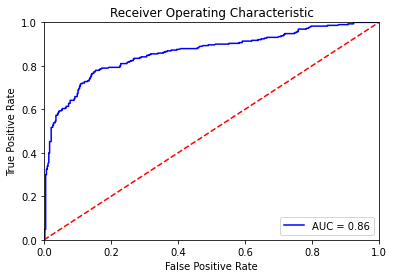

[[365  59]
 [ 72 218]]


In [ ]:

# calculate the fpr and tpr for all thresholds of the classification

def plot_ROC_curve(Y,preds):
  fpr, tpr, threshold = metrics.roc_curve(Y, preds)
  roc_auc = metrics.auc(fpr, tpr)


  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()


plot_ROC_curve(Y,my_df['LR_prob'])

print(confusion_matrix(Y,my_df['LR_prob']>0.5) )


# Naive Bayes Model

In [ ]:
###
# Calculate mean and variance of all the 'Gaussian'-like variablels in my_gauss_vars
###

class_list = [0,1]

means = [dict.fromkeys(my_gauss_vars) for surviv_class in class_list]
stds = [dict.fromkeys(my_gauss_vars) for surviv_class in class_list]

for surviv_class in class_list:
  print(f"Survived = {surviv_class}")
  for feature in my_gauss_vars:
    v = np.array(df[ df['Survived'] == surviv_class ][feature])
    means[surviv_class][feature] = np.nanmean(v)
    stds[surviv_class][feature] = np.nanstd(v)
    #print(v)
    print(f'. {feature}: Mean: {np.nanmean(v):.3f}, STD: {np.nanstd(v):.3f}')

Survived = 0
. Age: Mean: 30.626, STD: 14.155
. logFare: Mean: 2.710, STD: 0.868
Survived = 1
. Age: Mean: 28.344, STD: 14.925
. logFare: Mean: 3.367, STD: 0.984


In [ ]:
###
# Calculate mean (i.e. probability p) of all the 'Bernoulli'-like variablels in my_ber_vars
###

my_ber_vars = ['Pclass_' + str(i) for i in [1,2,3]]+['Sex_male','Sex_female'] + ['Parch_' + str(i) for i in range(4)] + ['SibSp_' + str(i) for i in range(5)]
p = [dict.fromkeys(my_ber_vars) for surviv_class in class_list]

for surviv_class in class_list:
  print(f"Survived = {surviv_class}")
  for feature in my_ber_vars:
    v = np.array(df[ df['Survived'] == surviv_class ][feature])
    p[surviv_class][feature] = (np.nansum(v) + 1)/(np.sum(~np.isnan(v)) + 1) #use the formula with +1's to avoid the situation of 0 prob estimates
    #print(v)
    print(f'. {feature}: p {np.nanmean(v):.3f}')


Survived = 0
. Pclass_1: p 0.146
. Pclass_2: p 0.177
. Pclass_3: p 0.678
. Sex_male: p 0.852
. Sex_female: p 0.148
. Parch_0: p 0.811
. Parch_1: p 0.097
. Parch_2: p 0.073
. Parch_3: p 0.004
. SibSp_0: p 0.725
. SibSp_1: p 0.177
. SibSp_2: p 0.027
. SibSp_3: p 0.022
. SibSp_4: p 0.027
Survived = 1
. Pclass_1: p 0.398
. Pclass_2: p 0.254
. Pclass_3: p 0.348
. Sex_male: p 0.319
. Sex_female: p 0.681
. Parch_0: p 0.681
. Parch_1: p 0.190
. Parch_2: p 0.117
. Parch_3: p 0.009
. SibSp_0: p 0.614
. SibSp_1: p 0.327
. SibSp_2: p 0.038
. SibSp_3: p 0.012
. SibSp_4: p 0.009


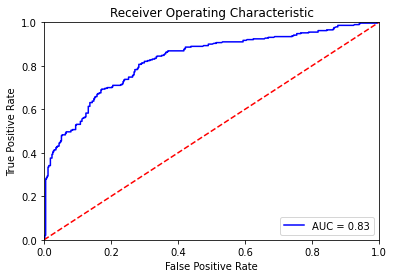

[[301 123]
 [ 55 235]]


In [ ]:
###
# Compute the negative log-likelhood of each class according to Naive Bayes
###


def sigmoid(x):
  return 1/(1+np.exp(x))

nLL = [0 for surviv_class in [0,1]]
for i in [0,1]:
  nLL[i] = -sum( [ 0.5*( (my_df[var] - means[i][var])/stds[i][var] )**2 for var in my_gauss_vars ] )

  ber_factor = 1#increasing the importance of these variables seems to help!
  nLL[i] += ber_factor*sum( [ my_df[var]*np.log( p[i][var])  for var in my_ber_vars])
my_df['NB_prob'] = sigmoid(nLL[0] - nLL[1])

plot_ROC_curve(Y,my_df['NB_prob'])

print(confusion_matrix(Y,my_df['NB_prob']>0.5) )

#Comparisons

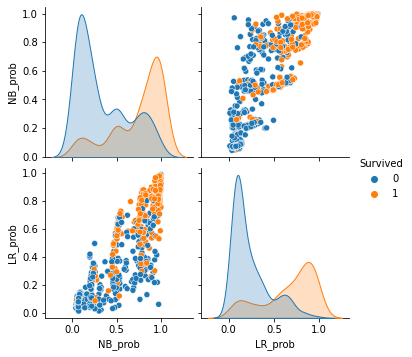

In [ ]:
sns.pairplot(my_df, vars=['NB_prob','LR_prob'], hue="Survived",dropna=True)